In [1]:
import pandas as pd

In [2]:
vendas = pd.read_csv(r'C:\Users\henrique.mourao\PyCharmMiscProject\EstudoPython\Dataset\vendas_varejo.csv',encoding="latin1", parse_dates=['Data'])

In [3]:
vendas.set_index("Data", inplace=True)

In [4]:
display(vendas.count())

Cidade                 1000
Produto                1000
Qtd_Venda              1000
Preco_Unitario         1000
Desconto_Percentual    1000
Total_Venda            1000
Mes                    1000
dtype: int64

In [5]:
vendas['Cidade'].unique()

array(['Curitiba', 'Porto Alegre', 'Belo Horizonte', 'Rio de Janeiro',
       'SÃ£o Paulo'], dtype=object)

In [6]:
vendas.sort_index(ascending=True, inplace=True)

In [7]:
vendas.loc[['2025-12-11', '2025-12-31'],['Produto', 'Cidade', 'Total_Venda']]

,Produto,Cidade,Total_Venda
Data,,,
2025-12-11,Smartphone,Porto Alegre,2023.731
2025-12-31,Tablet,Porto Alegre,17331.360


In [8]:
vendas.loc[:, ['Produto', 'Cidade', 'Total_Venda']].head()

,Produto,Cidade,Total_Venda
Data,,,
2024-01-01,Tablet,Curitiba,6250.3350
2024-01-02,Tablet,Porto Alegre,24434.3610
2024-01-03,Tablet,Belo Horizonte,22681.4580
2024-01-04,Tablet,Porto Alegre,29507.0445
2024-01-05,Fone de Ouvido,Porto Alegre,8403.0400


In [9]:
vendas.loc['2025-12-11']

Cidade                 Porto Alegre
Produto                  Smartphone
Qtd_Venda                         1
Preco_Unitario              2380.86
Desconto_Percentual            0.15
Total_Venda                2023.731
Mes                        December
Name: 2025-12-11 00:00:00, dtype: object

In [10]:
selecao_data = vendas.loc[['2025-12-11', '2025-12-31'],['Produto', 'Cidade', 'Total_Venda']]

In [11]:
display(selecao_data.count())

Produto        2
Cidade         2
Total_Venda    2
dtype: int64

In [12]:
# Definindo o filtro (Regra de Negócio)
filiais_sul = ['Curitiba', 'Porto Alegre']

# Aplicando o filtro com .isin
vendas_sul = vendas[vendas['Cidade'].isin(filiais_sul)]

print(f"Total de vendas filtradas: {len(vendas_sul)}")
display(vendas_sul.head())

Total de vendas filtradas: 410


,Cidade,Produto,Qtd_Venda,Preco_Unitario,Desconto_Percentual,Total_Venda,Mes
Data,,,,,,,
2024-01-01,Curitiba,Tablet,7,939.90,0.05,6250.3350,January
2024-01-02,Porto Alegre,Tablet,9,2857.82,0.05,24434.3610,January
2024-01-04,Porto Alegre,Tablet,9,3857.13,0.15,29507.0445,January
2024-01-05,Porto Alegre,Fone de Ouvido,2,4201.52,0.00,8403.0400,January
2024-01-10,Porto Alegre,Smartphone,3,476.71,0.00,1430.1300,January


In [13]:
regra_vip = (vendas['Total_Venda'] > 10000) & (vendas['Desconto_Percentual'] > 0.0)
vendas_vip = vendas[regra_vip]

(vendas_vip
    .style
    .format({
        'Total_Venda': 'R$ {:,.2f}',
        'Desconto_Percentual': '{:.2%}'
    })
    .background_gradient(subset=['Total_Venda'], cmap='Greens')
    .background_gradient(subset=['Desconto_Percentual'], cmap='Reds')
)

,Cidade,Produto,Qtd_Venda,Preco_Unitario,Desconto_Percentual,Total_Venda,Mes
Data,,,,,,,
2024-01-02 00:00:00,Porto Alegre,Tablet,9,2857.820000,5.00%,"R$ 24,434.36",January
2024-01-03 00:00:00,Belo Horizonte,Tablet,9,2800.180000,10.00%,"R$ 22,681.46",January
2024-01-04 00:00:00,Porto Alegre,Tablet,9,3857.130000,15.00%,"R$ 29,507.04",January
2024-01-07 00:00:00,Belo Horizonte,Smartphone,7,1651.200000,10.00%,"R$ 10,402.56",January
2024-01-13 00:00:00,Porto Alegre,Fone de Ouvido,9,4838.800000,15.00%,"R$ 37,016.82",January
2024-01-16 00:00:00,Rio de Janeiro,Notebook,8,2986.240000,5.00%,"R$ 22,695.42",January
2024-01-20 00:00:00,Curitiba,Tablet,7,2546.710000,5.00%,"R$ 16,935.62",January
2024-01-22 00:00:00,Porto Alegre,Notebook,8,4970.470000,15.00%,"R$ 33,799.20",January
2024-01-23 00:00:00,Curitiba,Smartwatch,5,4425.510000,10.00%,"R$ 19,914.79",January


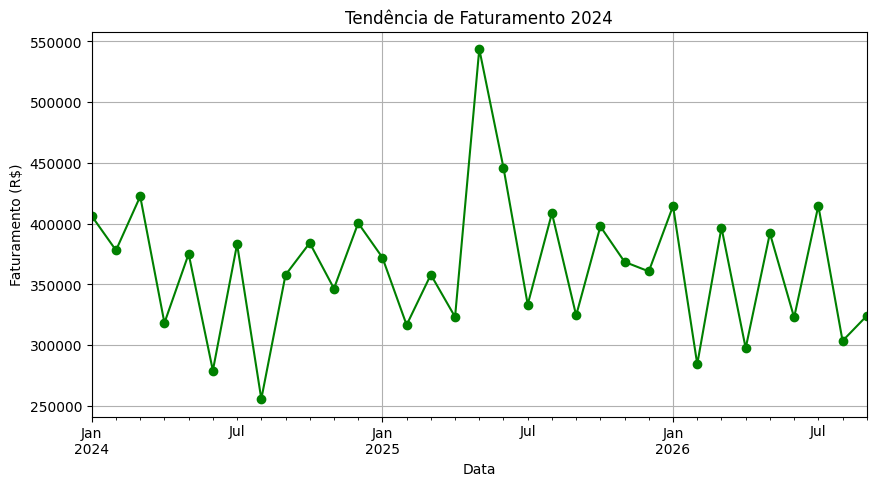

In [14]:
# 1. Primeiro preparamos os dados (Agrupamento por Mês)
# Resample 'M' agrupa pela média/soma mensal quando o índice é data
vendas_mensais = vendas['Total_Venda'].resample('ME').sum()

# 2. Plotagem direta
# O Pandas usa o matplotlib nos bastidores, mas a sintaxe é pura Orientação a Objeto do Pandas
grafico = vendas_mensais.plot(
    kind='line',
    title='Tendência de Faturamento 2024',
    figsize=(10, 5),
    grid=True,
    marker='o', # Bolinha nos pontos
    color='green'
)

# Adicionando rótulo Y (opcional, mas bom costume)
grafico.set_ylabel("Faturamento (R$)");


In [15]:
import numpy as np
# Configuração
np.random.seed(42)
n_dias = 200

# 1. Criando variáveis INDEPENDENTES (Causas)
# Temperatura: varia entre 15°C e 40°C
temperatura = np.random.uniform(15, 40, n_dias)

# Preço do Sorvete: varia entre R$ 5,00 e R$ 12,00
preco = np.random.uniform(5, 12, n_dias)

# Investimento em Marketing (Ads): varia entre R$ 0 e R$ 100/dia
marketing = np.random.uniform(0, 100, n_dias)

# Chuva (mm): A maioria dos dias é 0, alguns chovem muito
chuva = np.random.exponential(scale=5, size=n_dias) # Distribuição exponencial para simular chuva

# ID aleatório (para provar que não tem correlação)
id_transacao = np.random.randint(1000, 9000, n_dias)

# 2. Criando a variável DEPENDENTE (Consequência: Vendas)
# Fórmula Mágica: Vendas Base + Efeito Temp + Efeito Mkt - Efeito Preço - Efeito Chuva + Acaso
numero_vendas_correlacionado = (
    100 +                       # Base fixa
    (temperatura * 5) +         # + Calor = + Vendas (Correlação Positiva Forte)
    (marketing * 2) -           # + Marketing = + Vendas (Correlação Positiva Média)
    (preco * 15) -              # + Preço = - Vendas (Correlação Negativa)
    (chuva * 3) +               # + Chuva = - Vendas (Correlação Negativa)
    np.random.normal(0, 20, n_dias) # "Ruído" (coisas que não explicamos)
)

# Montando o DataFrame
vendas_unidade = pd.DataFrame({
    'Vendas (Alvo)': numero_vendas_correlacionado.astype(int),
    'Temperatura (C)': temperatura.round(1),
    'Marketing (R$)': marketing.round(2),
    'Preco Unitario (R$)': preco.round(2),
    'Chuva (mm)': chuva.round(1),
    'ID_Aleatorio': id_transacao
})

display(vendas_unidade.head())

,Vendas (Alvo),Temperatura (C),Marketing (R$),Preco Unitario (R$),Chuva (mm),ID_Aleatorio
0,63,24.4,10.31,9.49,0.9,6959
1,420,38.8,90.26,5.59,1.6,1126
2,247,33.3,50.53,6.13,1.0,4177
3,228,30.0,82.65,11.29,0.5,4056
4,144,18.9,32.00,9.25,0.6,1603


In [16]:
correlacao = vendas_unidade.corr()['Vendas (Alvo)'].sort_values
display(correlacao)

<bound method Series.sort_values of Vendas (Alvo)          1.000000
Temperatura (C)        0.401983
Marketing (R$)         0.754447
Preco Unitario (R$)   -0.495037
Chuva (mm)            -0.192546
ID_Aleatorio          -0.035189
Name: Vendas (Alvo), dtype: float64>

<Axes: title={'center': 'Correlacao de Vendas (Alvo)'}>

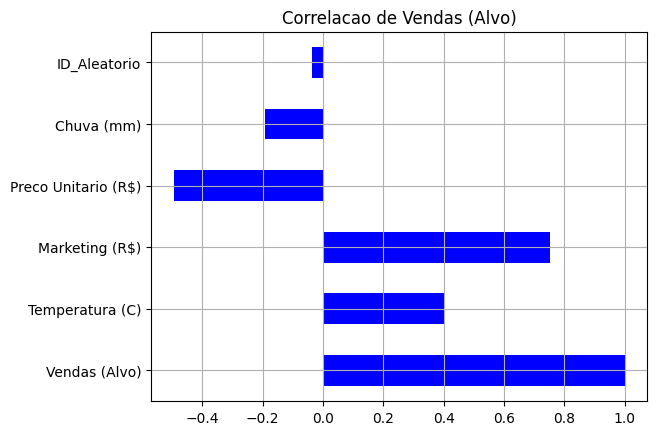

In [17]:
correlacao = vendas_unidade.corr()['Vendas (Alvo)']
correlacao.plot(kind='barh', title='Correlacao de Vendas (Alvo)', color='blue', grid=True )

In [18]:
correlacao = vendas_unidade.corr()['Vendas (Alvo)'].sort_values(ascending=False)
pd.DataFrame(correlacao).style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,Vendas (Alvo)
Vendas (Alvo),1.000000
Marketing (R$),0.754447
Temperatura (C),0.401983
ID_Aleatorio,-0.035189
Chuva (mm),-0.192546
Preco Unitario (R$),-0.495037


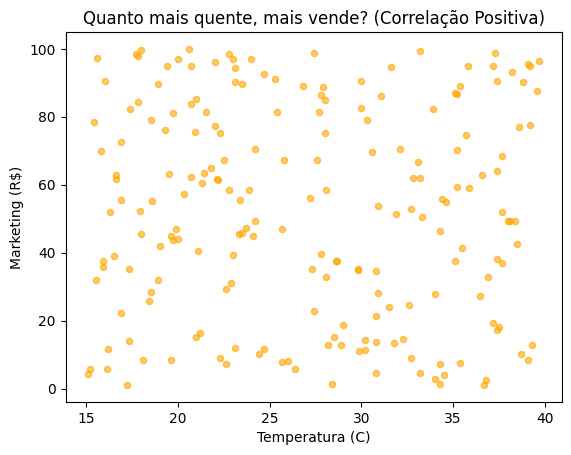

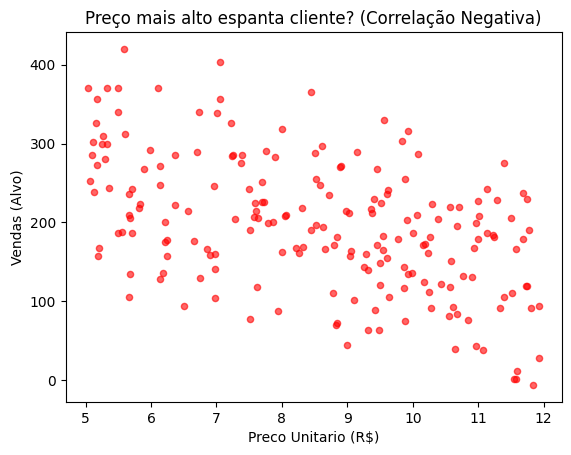

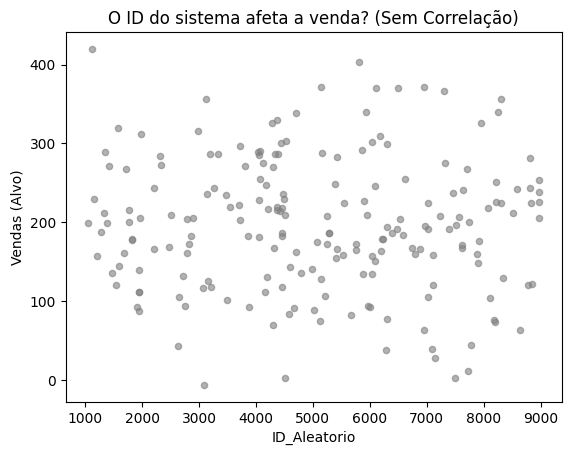

In [19]:
# Exemplo 1: Correlação POSITIVA (Temperatura)
vendas_unidade.plot.scatter(
    x='Temperatura (C)',
    y='Marketing (R$)',
    title='Quanto mais quente, mais vende? (Correlação Positiva)',
    color='orange',
    alpha=0.6 # Transparência ajuda se tiver muitos pontos juntos
);

# Exemplo 2: Correlação NEGATIVA (Preço)
vendas_unidade.plot.scatter(
    x='Preco Unitario (R$)',
    y='Vendas (Alvo)',
    title='Preço mais alto espanta cliente? (Correlação Negativa)',
    color='red',
    alpha=0.6
);

# Exemplo 3: SEM CORRELAÇÃO (Ruído)
vendas_unidade.plot.scatter(
    x='ID_Aleatorio',
    y='Vendas (Alvo)',
    title='O ID do sistema afeta a venda? (Sem Correlação)',
    color='gray',
    alpha=0.6
);